In [25]:
import pandas as pd
import numpy as np

In [26]:
abandoned_df = pd.read_csv('/Users/kaziamithasan/Desktop/Research/msr25/msr25-mining-challenge/code/active_projects_with_labels.csv')

In [27]:
abandoned_df


,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap
0,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,NaN,0,Start,NaN
1,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,1.829838,0,Active,1 days 19:54:58
2,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,366.572812,0,Dormant,366 days 13:44:51
3,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,2457.471412,0,Dormant,2457 days 11:18:50
4,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,0.033727,0,Active,0 days 00:48:34
...,...,...,...,...,...,...,...,...
10229182,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,205.366493,0,Active,205 days 08:47:45
10229183,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,1051.287141,0,Dormant,1051 days 06:53:29
10229184,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,664.757419,0,Dormant,664 days 18:10:41
10229185,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,22.763472,0,Active,22 days 18:19:24


In [30]:
#test = 'com.gaborpihaj:mtg4s-inventory_2.13'
artifact_id_to_inspect = "aero.m-click:mcpdf"
test = abandoned_df[abandoned_df['artifact_id'] == artifact_id_to_inspect]
test = test.sort_values(by='release_timestamp').reset_index(drop=True)
test

,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap
0,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,NaN,0,Start,NaN
1,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,1.829838,0,Active,1 days 19:54:58
2,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,366.572812,0,Dormant,366 days 13:44:51
3,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,2457.471412,0,Dormant,2457 days 11:18:50
4,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,0.033727,0,Active,0 days 00:48:34
5,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.7,0.2.7,2023-01-25 23:12:45,0.009340,0,Active,0 days 00:13:27
6,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.8,0.2.8,2023-01-28 00:41:43,2.061782,0,Active,2 days 01:28:58
7,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.9,0.2.9,2023-01-28 01:21:24,0.027558,0,Active,0 days 00:39:41
8,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.10,0.2.10,2023-01-28 01:42:16,0.014491,0,Active,0 days 00:20:52


In [4]:

# Convert 'release_timestamp' to datetime if not already
abandoned_df['release_timestamp'] = pd.to_datetime(abandoned_df['release_timestamp'])

# Calculate the duration and total releases per artifact
artifact_stats = abandoned_df.groupby('artifact_id').agg(
    first_release=('release_timestamp', 'min'),
    last_release=('release_timestamp', 'max'),
    total_releases=('release_id', 'count')
).reset_index()


In [5]:
artifact_stats

,artifact_id,first_release,last_release,total_releases
0,aero.m-click:mcpdf,2015-05-02 01:12:05,2023-01-28 01:42:16,9
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,2023-08-01 19:26:50,2024-04-02 12:45:18,6
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:18,6
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,2023-08-01 19:26:49,2024-04-02 12:45:17,6
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:19,6
...,...,...,...,...
196275,zone.src.sheaf:java-sheaf,2015-01-23 11:38:51,2023-08-21 12:09:42,17
196276,zone.src.sheaf:logback-sheaf,2015-03-20 08:18:15,2023-08-21 10:56:45,11
196277,zone.src.sheaf:sheaf-deps-bom,2017-05-06 11:42:13,2023-08-21 11:56:48,5
196278,zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20


In [6]:
artifact_stats['duration (days)'] = (artifact_stats['last_release'] - artifact_stats['first_release']).dt.days


In [7]:
artifact_stats


,artifact_id,first_release,last_release,total_releases,duration (days)
0,aero.m-click:mcpdf,2015-05-02 01:12:05,2023-01-28 01:42:16,9,2828
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,2023-08-01 19:26:50,2024-04-02 12:45:18,6,244
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:18,6,244
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,2023-08-01 19:26:49,2024-04-02 12:45:17,6,244
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:19,6,244
...,...,...,...,...,...
196275,zone.src.sheaf:java-sheaf,2015-01-23 11:38:51,2023-08-21 12:09:42,17,3132
196276,zone.src.sheaf:logback-sheaf,2015-03-20 08:18:15,2023-08-21 10:56:45,11,3076
196277,zone.src.sheaf:sheaf-deps-bom,2017-05-06 11:42:13,2023-08-21 11:56:48,5,2298
196278,zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20,3131


In [8]:
artifact_stats.describe()

,first_release,last_release,total_releases,duration (days)
count,196280,196280,196280.000000,196280.000000
mean,2020-11-07 06:28:44.972427264,2024-01-16 11:23:58.353464320,52.115279,1164.687176
min,2014-09-04 00:03:53,2022-09-04 00:58:02,2.000000,0.000000
25%,2019-08-10 11:07:26,2023-07-23 20:20:02,7.000000,461.000000
50%,2021-07-28 00:49:42.500000,2024-04-10 13:56:08.500000,17.000000,920.000000
75%,2022-10-08 13:20:23,2024-07-26 07:28:31.249999872,47.000000,1662.000000
max,2023-08-29 23:14:26,2024-08-29 23:13:51,3819.000000,3647.000000
std,NaN,NaN,139.768151,930.797432


In [9]:
# Define duration categories
artifact_stats['duration_category'] = pd.cut(
    artifact_stats['duration (days)'],
    bins=[-1, 365, 730, np.inf],  # 1 year = 365 days, 2 years = 730 days
    labels=['<1 year', '1-2 years', '>2 years']
)

# Count artifacts in each category
duration_summary = artifact_stats['duration_category'].value_counts()


In [10]:
duration_summary

duration_category
>2 years     116000
1-2 years     43420
<1 year       36860
Name: count, dtype: int64

In [11]:
# # Define total release categories
# release_bins = [0, 50, 100, 300, np.inf]  # Bins for total releases
# release_labels = ['<50', '50-100', '100-300', '>300']

# # Categorize total releases
# artifact_stats['release_category'] = pd.cut(
#     artifact_stats['total_releases'], 
#     bins=release_bins, 
#     labels=release_labels
# )

# # Combine duration and release categories
# artifact_stats['combined_category'] = artifact_stats['duration_category'].astype(str) + ", " + artifact_stats['release_category'].astype(str)
# artifact_stats

# Define new bins and labels for total releases
release_bins = [0, 2, 5, 20, np.inf]  # New bins for total releases
release_labels = ['<2', '2-5', '5-20', '>20']

# Categorize total releases
artifact_stats['release_category'] = pd.cut(
    artifact_stats['total_releases'], 
    bins=release_bins, 
    labels=release_labels
)

# Combine duration and release categories
artifact_stats['combined_category'] = artifact_stats['duration_category'].astype(str) + ", " + artifact_stats['release_category'].astype(str)

# Display the modified DataFrame
artifact_stats


,artifact_id,first_release,last_release,total_releases,duration (days),duration_category,release_category,combined_category
0,aero.m-click:mcpdf,2015-05-02 01:12:05,2023-01-28 01:42:16,9,2828,>2 years,5-20,">2 years, 5-20"
1,africa.shuwari.sbt:sbt-shuwari-core_2.12_1.0,2023-08-01 19:26:50,2024-04-02 12:45:18,6,244,<1 year,5-20,"<1 year, 5-20"
2,africa.shuwari.sbt:sbt-shuwari-header_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:18,6,244,<1 year,5-20,"<1 year, 5-20"
3,africa.shuwari.sbt:sbt-shuwari-js_2.12_1.0,2023-08-01 19:26:49,2024-04-02 12:45:17,6,244,<1 year,5-20,"<1 year, 5-20"
4,africa.shuwari.sbt:sbt-shuwari-mode_2.12_1.0,2023-08-01 19:26:51,2024-04-02 12:45:19,6,244,<1 year,5-20,"<1 year, 5-20"
...,...,...,...,...,...,...,...,...
196275,zone.src.sheaf:java-sheaf,2015-01-23 11:38:51,2023-08-21 12:09:42,17,3132,>2 years,5-20,">2 years, 5-20"
196276,zone.src.sheaf:logback-sheaf,2015-03-20 08:18:15,2023-08-21 10:56:45,11,3076,>2 years,5-20,">2 years, 5-20"
196277,zone.src.sheaf:sheaf-deps-bom,2017-05-06 11:42:13,2023-08-21 11:56:48,5,2298,>2 years,2-5,">2 years, 2-5"
196278,zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20,3131,>2 years,5-20,">2 years, 5-20"


In [12]:
# Create a cross table
cross_table = pd.crosstab(
    artifact_stats['duration_category'], 
    artifact_stats['release_category']
)
cross_table

release_category,<2,2-5,5-20,>20
duration_category,,,,
<1 year,8500,13757,12317,2286
1-2 years,1366,6599,21638,13817
>2 years,1506,7406,34389,72699


In [13]:
np.random.seed(42)


In [14]:
# Randomly sample 50 data points from each category combination
sampled_data = artifact_stats.groupby(['duration_category', 'release_category']).apply(
    lambda x: x.sample(n=50, replace=False, random_state=42) if len(x) >= 50 else x
).reset_index(drop=True)

# Display sampled data
sampled_data

/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_6266/1124500807.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_data = artifact_stats.groupby(['duration_category', 'release_category']).apply(
/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_6266/1124500807.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = artifact_stats.groupby(['duration_category', 'release_category']).apply(


,artifact_id,first_release,last_release,total_releases,duration (days),duration_category,release_category,combined_category
0,org.apache.isis.core:isis-core-privileged,2022-10-03 05:47:00,2022-10-14 09:01:43,2,11,<1 year,<2,"<1 year, <2"
1,org.danbrough.sqldelight:coroutines-extensions,2022-10-01 22:56:24,2022-11-03 19:36:09,2,32,<1 year,<2,"<1 year, <2"
2,org.danbrough.touchlab:stately-iso-collections...,2022-10-09 23:16:31,2022-11-03 02:00:38,2,24,<1 year,<2,"<1 year, <2"
3,io.kotest.extensions:kotest-extensions-koin-ma...,2023-08-29 22:22:08,2023-09-25 15:04:08,2,26,<1 year,<2,"<1 year, <2"
4,org.apache.james:apache-james-elasticsearch,2023-05-17 07:21:41,2024-02-11 22:34:04,2,270,<1 year,<2,"<1 year, <2"
...,...,...,...,...,...,...,...,...
595,com.avito.android:android,2021-02-24 22:41:41,2023-10-18 15:23:23,51,965,>2 years,>20,">2 years, >20"
596,com.avito.android:math,2021-02-24 22:37:53,2023-10-18 15:19:06,51,965,>2 years,>20,">2 years, >20"
597,io.getquill:quill-codegen-tests_2.12,2019-05-27 20:00:29,2023-05-25 15:08:44,59,1458,>2 years,>20,">2 years, >20"
598,io.github.vigoo:zio-aws-servicequotas_2.12,2020-08-24 20:27:03,2022-09-28 21:46:54,297,765,>2 years,>20,">2 years, >20"


In [15]:
sampled_data['combined_category'].value_counts()

combined_category
<1 year, <2        50
<1 year, 2-5       50
<1 year, 5-20      50
<1 year, >20       50
1-2 years, <2      50
1-2 years, 2-5     50
1-2 years, 5-20    50
1-2 years, >20     50
>2 years, <2       50
>2 years, 2-5      50
>2 years, 5-20     50
>2 years, >20      50
Name: count, dtype: int64

In [16]:
# Extract sampled artifact IDs
sampled_artifact_ids = sampled_data['artifact_id'].unique()

In [17]:
# Filter abandoned_df for sampled artifact IDs
filtered_release_history = abandoned_df[abandoned_df['artifact_id'].isin(sampled_artifact_ids)].copy()

# Calculate days since first release for each artifact
filtered_release_history['first_release'] = filtered_release_history.groupby('artifact_id')['release_timestamp'].transform('min')
filtered_release_history['days_since_first_release'] = (
    filtered_release_history['release_timestamp'] - filtered_release_history['first_release']
).dt.days


In [18]:
# import matplotlib.pyplot as plt

# # Iterate through each artifact and create separate plots
# for artifact_id in sampled_artifact_ids:
#     # Create a separate DataFrame for this artifact
#     artifact_df = filtered_release_history[filtered_release_history['artifact_id'] == artifact_id]
    
#     # Sort by days since first release
#     artifact_df = artifact_df.sort_values('days_since_first_release')
    
#     # Plot release history for this artifact
#     plt.figure(figsize=(10, 6))
#     plt.step(
#         artifact_df['days_since_first_release'], 
#         range(1, len(artifact_df) + 1),  # Cumulative number of releases
#         label=f"Artifact: {artifact_id}",
#         alpha=0.7
#     )
    
#     # Customize the plot
#     plt.title(f'Release History for {artifact_id}', fontsize=14)
#     plt.xlabel('Days Since First Release', fontsize=12)
#     plt.ylabel('Number of Releases', fontsize=12)
#     plt.legend(loc='upper left', fontsize='small', frameon=False)
#     plt.tight_layout()
#     plt.show()

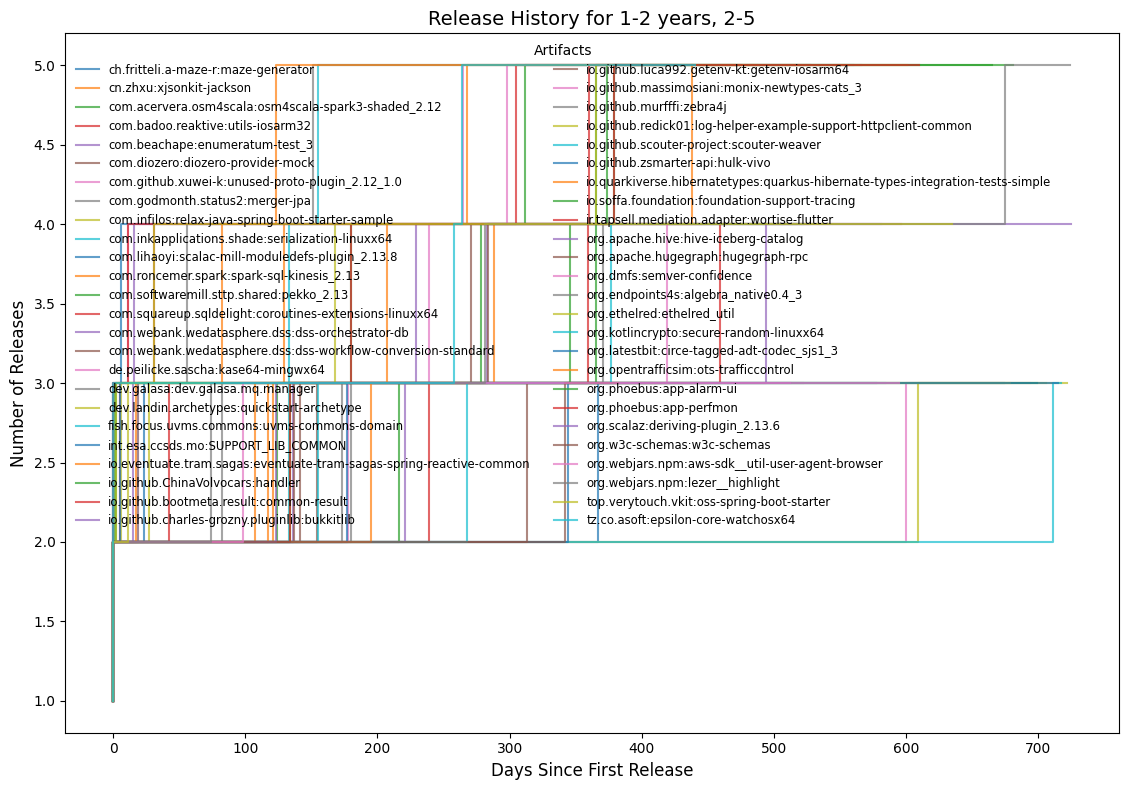

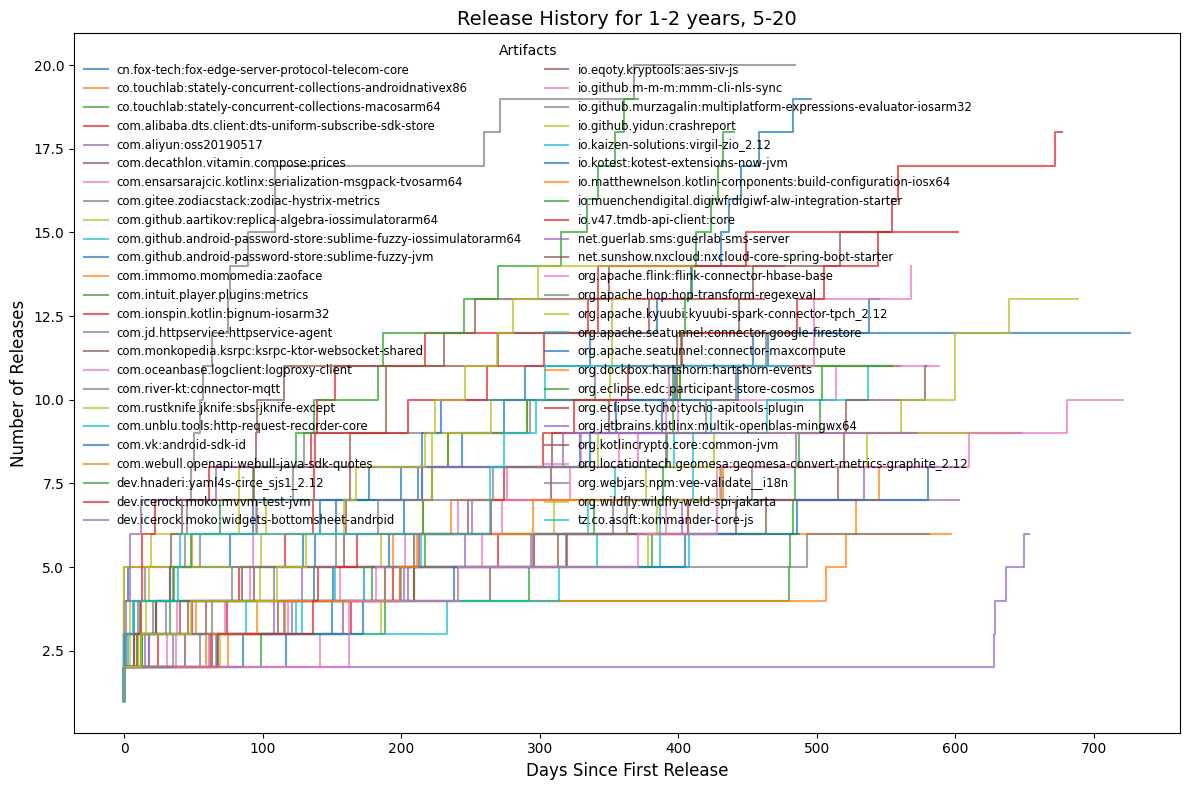

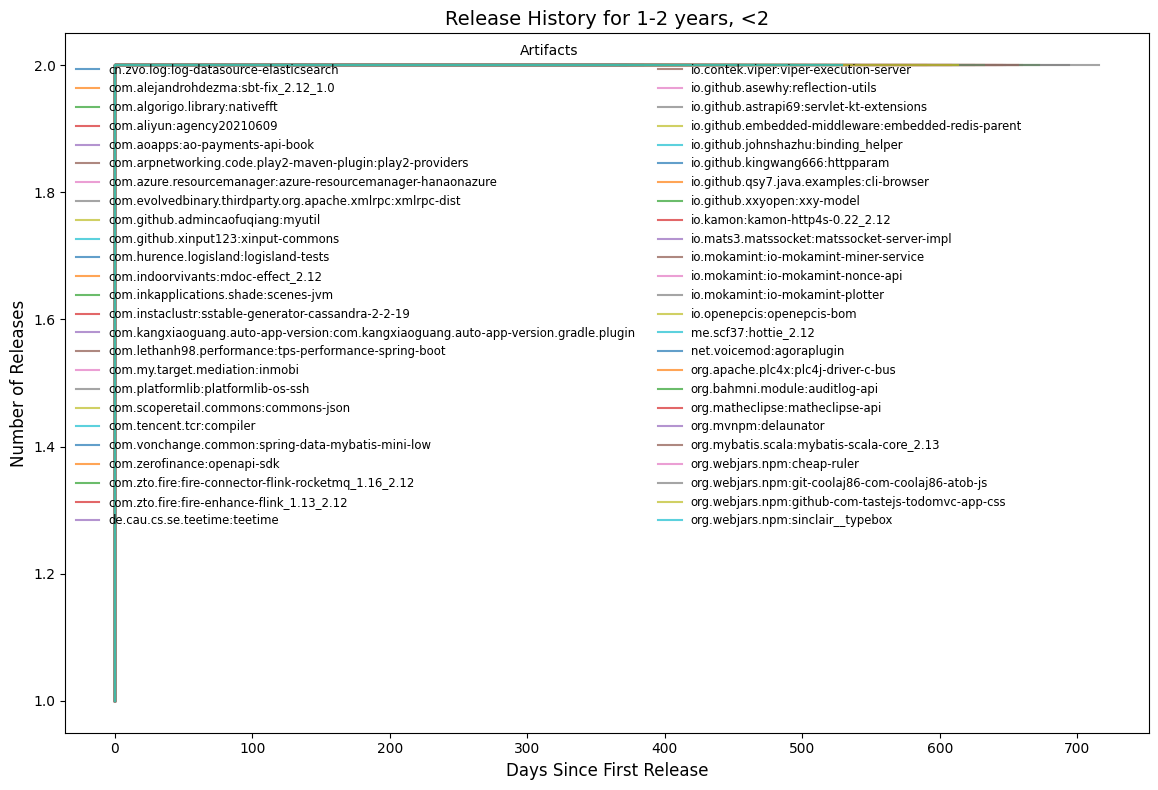

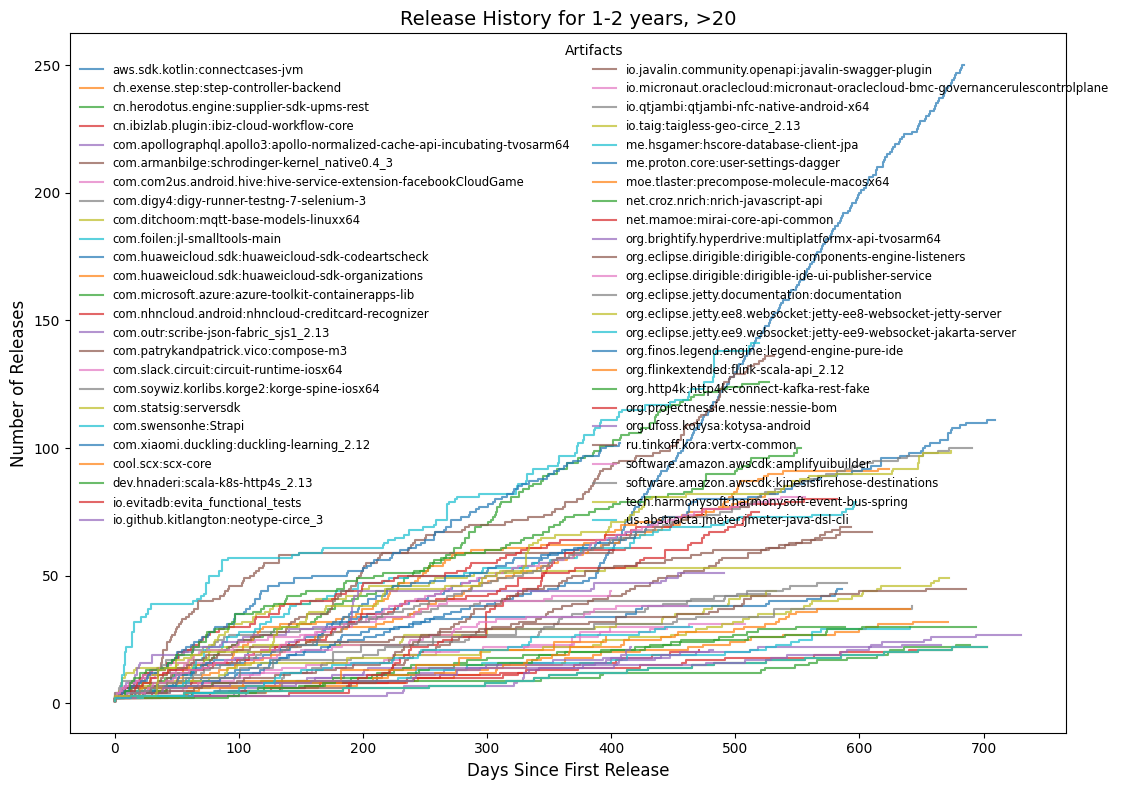

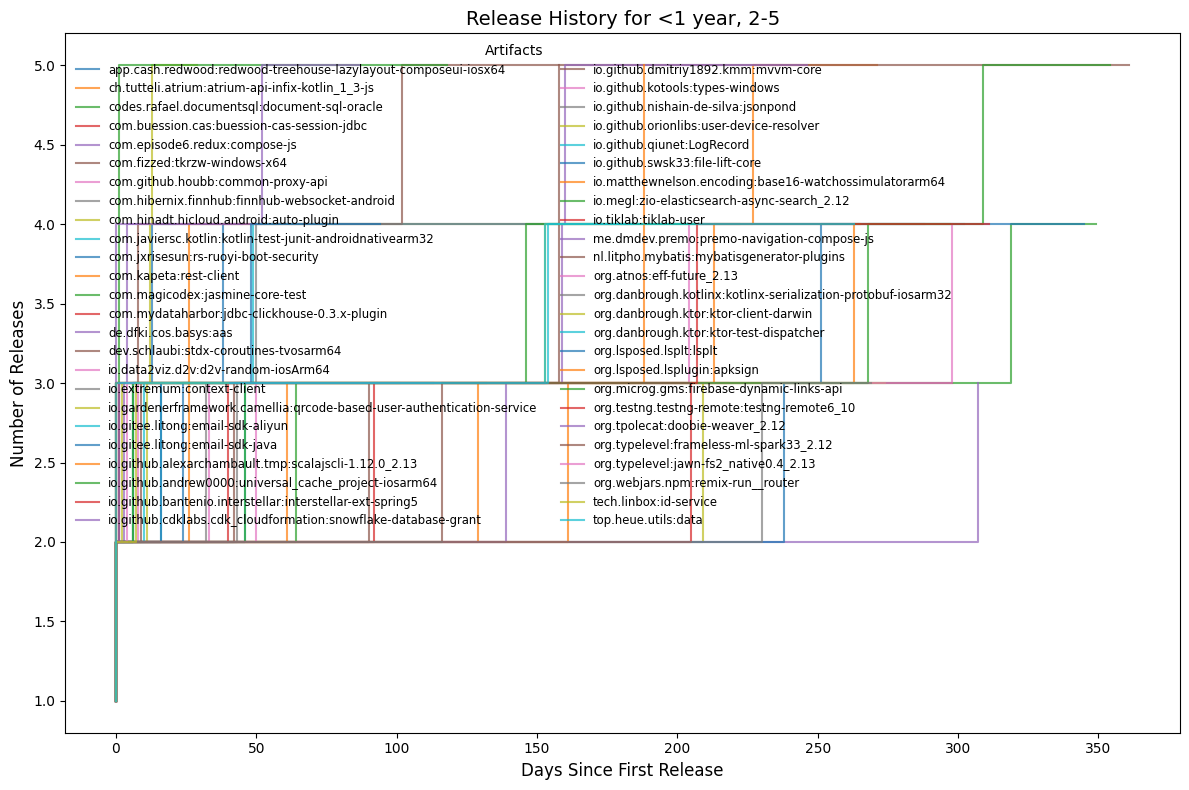

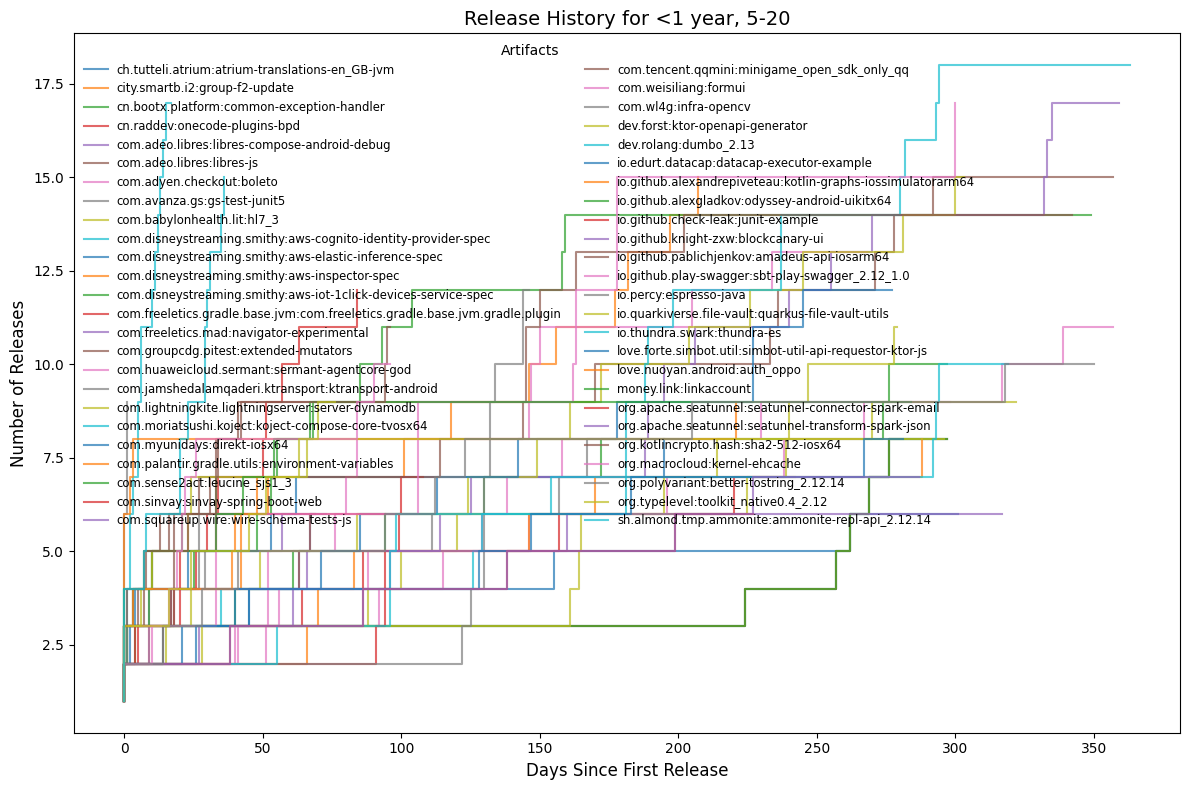

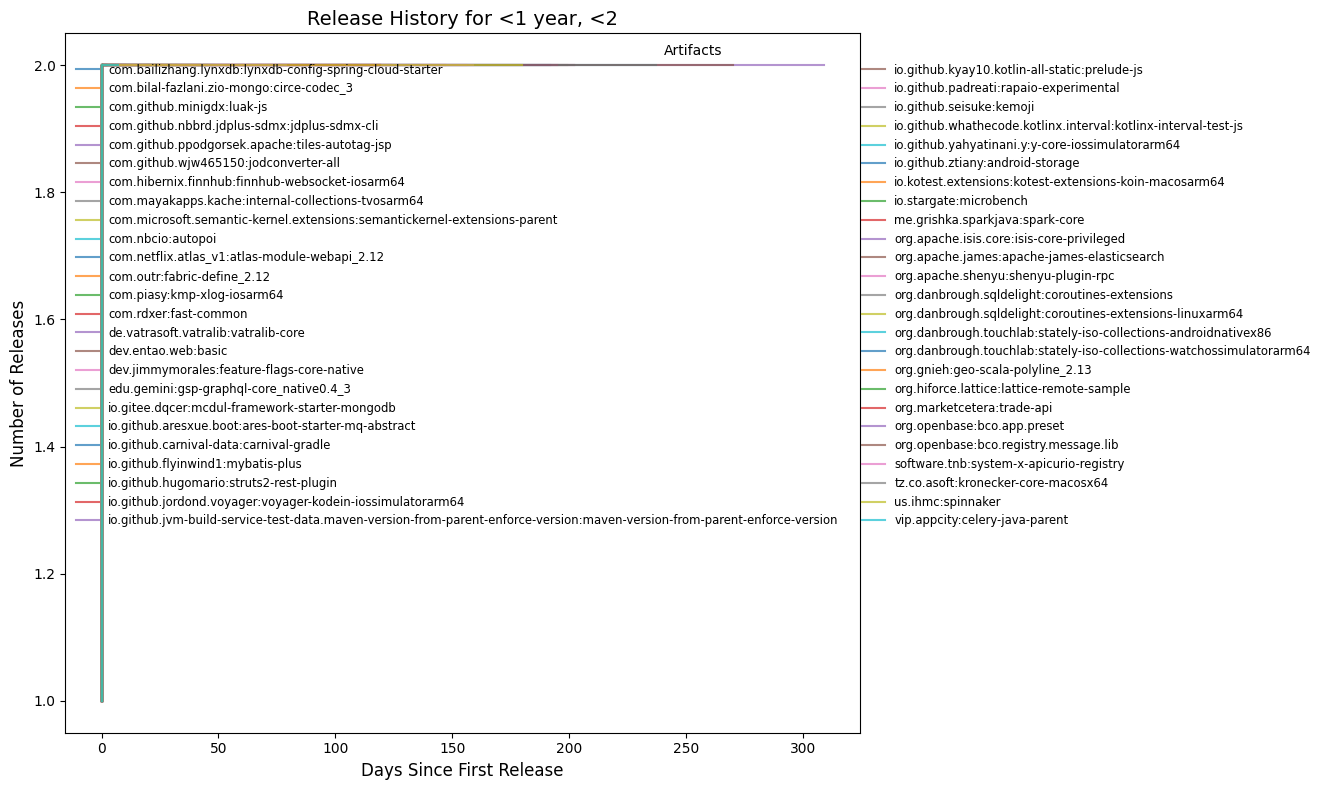

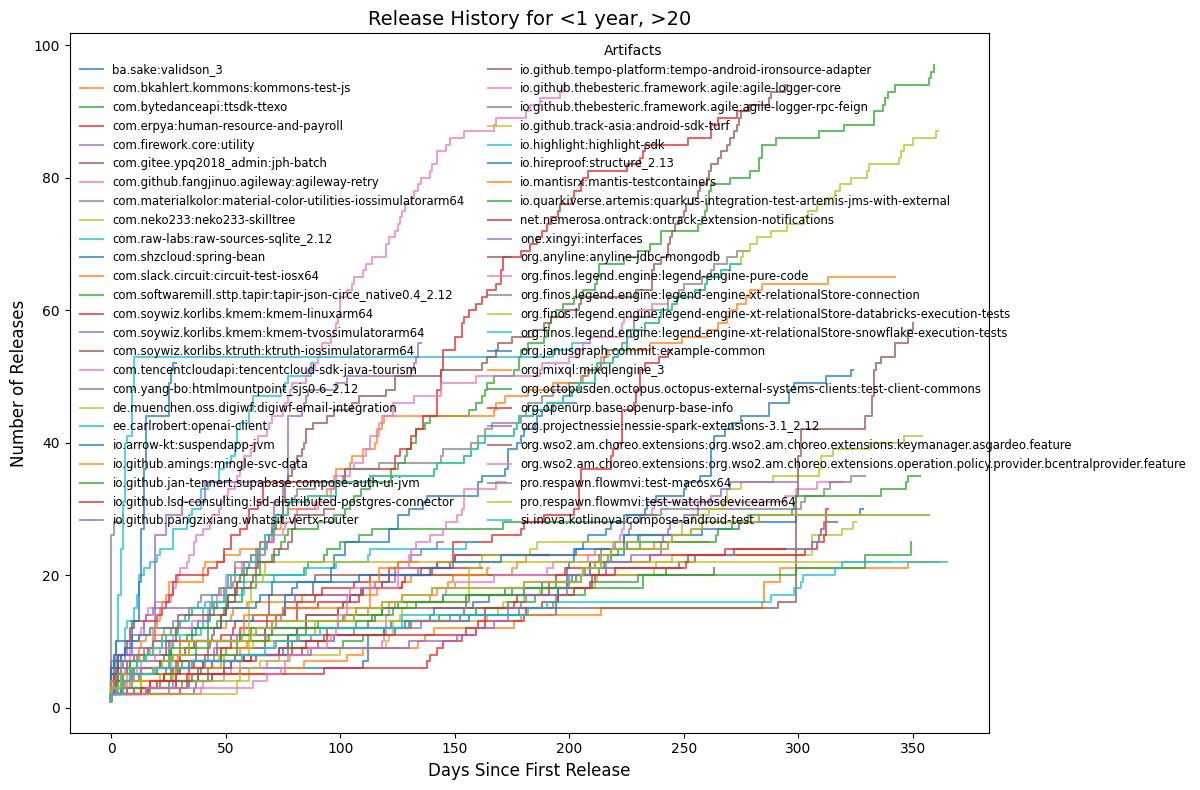

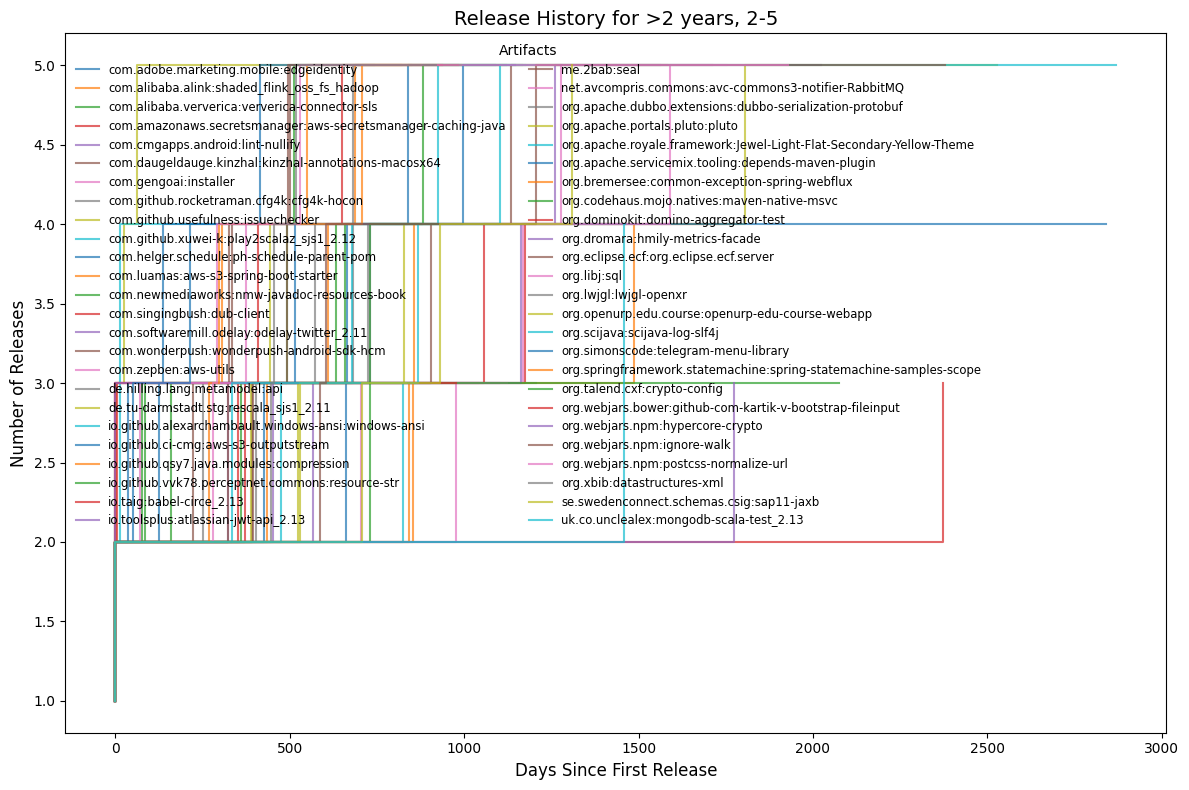

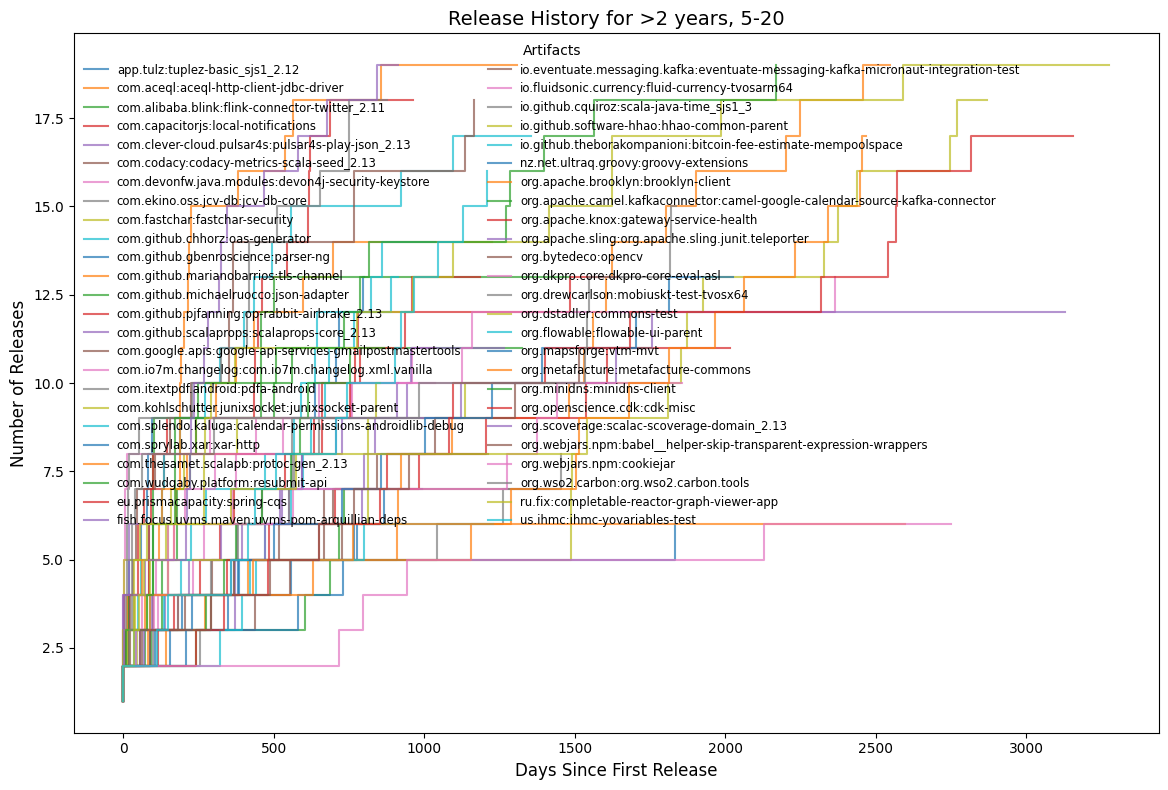

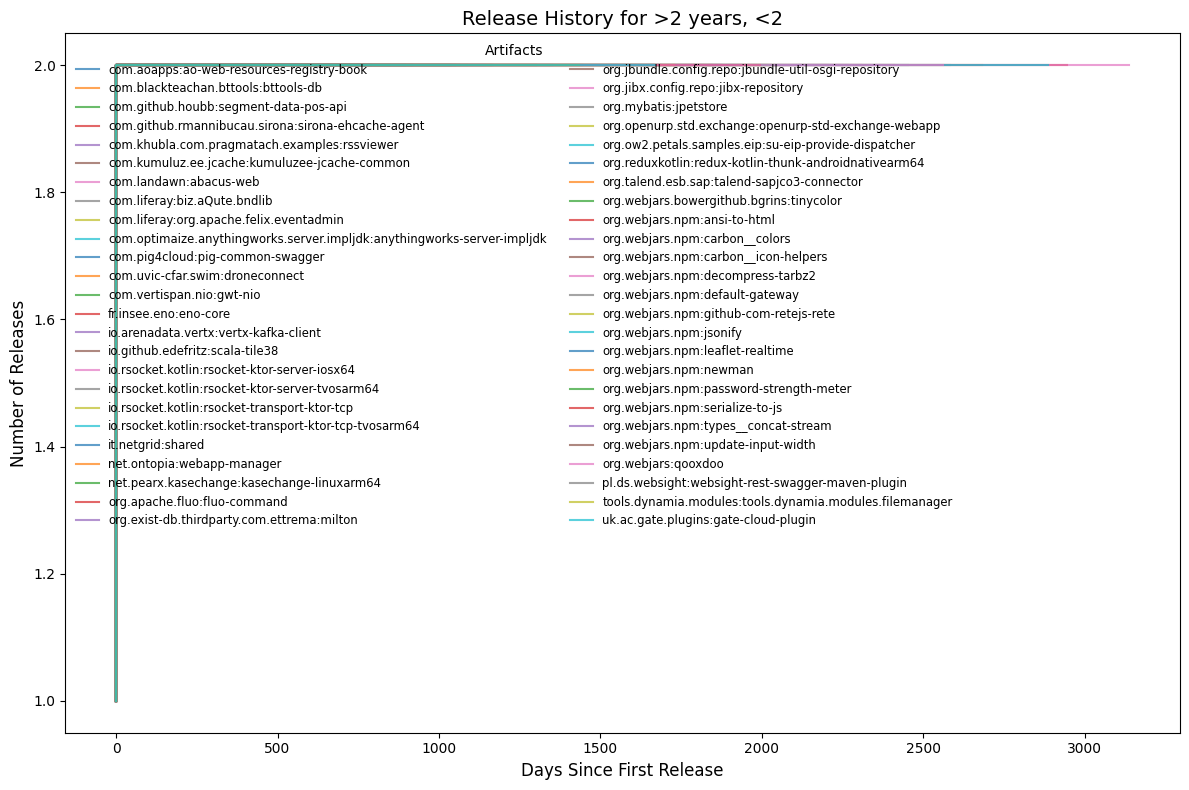

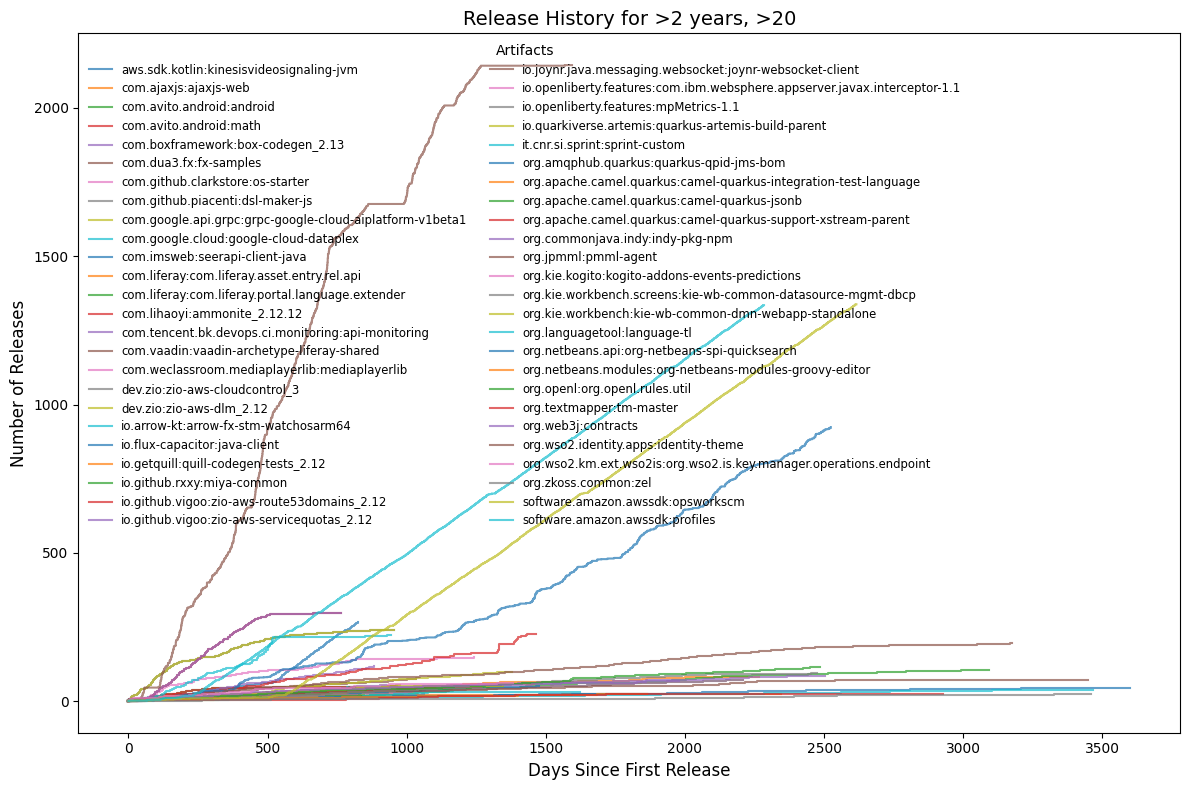

In [19]:
import matplotlib.pyplot as plt

# Group sampled_data by combined_category
for category, group in sampled_data.groupby('combined_category'):
    # Get artifact IDs for this category
    artifact_ids_in_category = group['artifact_id'].unique()
    
    # Filter release history for these artifact IDs
    category_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(artifact_ids_in_category)]
    
    # Plot release history for each artifact in this category
    fig, ax = plt.subplots(figsize=(12, 8))
    for artifact_id, data in category_release_history.groupby('artifact_id'):
        data = data.sort_values('days_since_first_release')
        ax.step(
            data['days_since_first_release'], 
            range(1, len(data) + 1),  # Cumulative number of releases
            label=f"{artifact_id}",
            alpha=0.7
        )
    
    # Customize plot
    ax.set_title(f'Release History for {category}', fontsize=14)
    ax.set_xlabel('Days Since First Release', fontsize=12)
    ax.set_ylabel('Number of Releases', fontsize=12)
    ax.legend(loc='upper left', fontsize='small', ncol=2, frameon=False, title='Artifacts')
    plt.tight_layout()
    plt.show()


In [20]:
# # Step 1: Group sampled_data by combined_category
# categories = sampled_data['combined_category'].unique()

# # Step 2: Iterate over each combined_category
# for category in categories:
#     # Filter artifacts belonging to the current category
#     category_artifacts = sampled_data[sampled_data['combined_category'] == category]['artifact_id'].unique()
    
#     # Filter release history for these artifacts
#     category_release_history = abandoned_df[abandoned_df['artifact_id'].isin(category_artifacts)].copy()
    
#     # Calculate days since first release for these artifacts
#     category_release_history['first_release'] = category_release_history.groupby('artifact_id')['release_timestamp'].transform('min')
#     category_release_history['days_since_first_release'] = (
#         category_release_history['release_timestamp'] - category_release_history['first_release']
#     ).dt.days

#     # Step 3: Create separate plots for each artifact within this category
#     print(f"Generating plots for combined category: {category}")
    
#     for artifact_id in category_artifacts:
#         # Create a DataFrame for this artifact
#         artifact_df = category_release_history[category_release_history['artifact_id'] == artifact_id]
        
#         # Sort by days since first release
#         artifact_df = artifact_df.sort_values('days_since_first_release')
        
#         # Plot release history for this artifact
#         plt.figure(figsize=(10, 6))
#         plt.step(
#             artifact_df['days_since_first_release'], 
#             range(1, len(artifact_df) + 1),  # Cumulative number of releases
#             label=f"Artifact: {artifact_id}",
#             alpha=0.7
#         )
        
#         # Customize the plot
#         plt.title(f'Release History for {artifact_id} in {category}', fontsize=14)
#         plt.xlabel('Days Since First Release', fontsize=12)
#         plt.ylabel('Number of Releases', fontsize=12)
#         plt.legend(loc='upper left', fontsize='small', frameon=False)
#         plt.tight_layout()
#         plt.show()


In [21]:
# import os

# np.random.seed(42)

# # Step 2: Create output directory for plots
# output_dir = "/Users/kaziamithasan/Desktop/Research/msr25/msr25-mining-challenge/code/release/release_history_plots_active"
# os.makedirs(output_dir, exist_ok=True)

# # Step 3: Group sampled_data by combined_category
# categories = sampled_data['combined_category'].unique()

# # Metadata for manual analysis
# manual_check_metadata = []

# for category in categories:
#     # Create a subdirectory for the category
#     category_dir = os.path.join(output_dir, category.replace(",", "_").replace(" ", "_"))
#     os.makedirs(category_dir, exist_ok=True)
    
#     # Filter artifacts belonging to the current category
#     category_artifacts = sampled_data[sampled_data['combined_category'] == category]['artifact_id'].unique()
    
#     # Filter release history for these artifacts
#     category_release_history = abandoned_df[abandoned_df['artifact_id'].isin(category_artifacts)].copy()
    
#     # Calculate days since first release for these artifacts
#     category_release_history['first_release'] = category_release_history.groupby('artifact_id')['release_timestamp'].transform('min')
#     category_release_history['days_since_first_release'] = (
#         category_release_history['release_timestamp'] - category_release_history['first_release']
#     ).dt.days

#     # Step 4: Create separate plots for each artifact within this category
#     print(f"Generating plots for combined category: {category}")
    
#     for artifact_id in category_artifacts:
#         # Create a DataFrame for this artifact
#         artifact_df = category_release_history[category_release_history['artifact_id'] == artifact_id]
        
#         # Sort by days since first release
#         artifact_df = artifact_df.sort_values('days_since_first_release')
        
#         # Plot release history for this artifact
#         plt.figure(figsize=(10, 6))
#         plt.step(
#             artifact_df['days_since_first_release'], 
#             range(1, len(artifact_df) + 1),  # Cumulative number of releases
#             label=f"Artifact: {artifact_id}",
#             alpha=0.7
#         )
        
#         # Customize the plot
#         plt.title(f'Release History for {artifact_id} in {category}', fontsize=14)
#         plt.xlabel('Days Since First Release', fontsize=12)
#         plt.ylabel('Number of Releases', fontsize=12)
#         plt.legend(loc='upper left', fontsize='small', frameon=False)
#         plt.tight_layout()
        
#         # Save the plot to the category folder
#         plot_filename = f"{artifact_id.replace(':', '_')}_release_history.png"
#         plot_path = os.path.join(category_dir, plot_filename)
#         plt.savefig(plot_path)
#         plt.close()
        
#         # Append metadata for manual analysis
#         manual_check_metadata.append({
#             "artifact_id": artifact_id,
#             "combined_category": category,
#             "plot_filename": plot_path
#         })

# # Step 5: Save metadata to a CSV file
# import pandas as pd

# metadata_df = pd.DataFrame(manual_check_metadata)
# metadata_file = os.path.join(output_dir, "manual_check_metadata.csv")
# metadata_df.to_csv(metadata_file, index=False)

# print(f"Plots and metadata saved to '{output_dir}' for manual analysis.")


In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)

# Output directory for plots
output_dir = "/Users/kaziamithasan/Desktop/Research/msr25/msr25-mining-challenge/code/release/release_history_plots_active_v2"
os.makedirs(output_dir, exist_ok=True)

# Group sampled_data by combined_category
categories = sampled_data['combined_category'].unique()

# Metadata for manual analysis
manual_check_metadata = []

for category in categories:
    # Create a subdirectory for the category
    category_dir = os.path.join(output_dir, category.replace(",", "_").replace(" ", "_"))
    os.makedirs(category_dir, exist_ok=True)
    
    # Filter artifacts belonging to the current category
    category_artifacts = sampled_data[sampled_data['combined_category'] == category]['artifact_id'].unique()
    
    # Filter release history for these artifacts
    category_release_history = abandoned_df[abandoned_df['artifact_id'].isin(category_artifacts)].copy()
    
    # Step 1: Sort each artifact's data by release timestamp
    category_release_history = category_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
    
    # Step 2: Calculate days since the first release for each artifact
    category_release_history['first_release'] = category_release_history.groupby('artifact_id')['release_timestamp'].transform('min')
    category_release_history['duration_since_first_release'] = (
        category_release_history['release_timestamp'] - category_release_history['first_release']
    ).dt.days

    # Step 3: Create plots for each artifact in this category
    print(f"Generating plots for combined category: {category}")
    
    for artifact_id in category_artifacts:
        # Filter the data for this specific artifact
        artifact_data = category_release_history[category_release_history['artifact_id'] == artifact_id]
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(
            artifact_data['duration_since_first_release'], 
            range(1, len(artifact_data) + 1),  # Cumulative release count
            marker='o', linestyle='-', alpha=0.8, label=artifact_id
        )
        plt.xlabel('Duration Since First Release (Days)', fontsize=12)
        plt.ylabel('Release Number', fontsize=12)
        plt.title(f'Release History of {artifact_id} in {category}', fontsize=14)
        plt.grid(True)
        plt.legend(loc='upper left', fontsize='small', frameon=False)
        plt.tight_layout()
        
        # Save the plot to the category folder
        plot_filename = f"{artifact_id.replace(':', '_')}_release_history.png"
        plot_path = os.path.join(category_dir, plot_filename)
        plt.savefig(plot_path)
        plt.close()
        
        # Append metadata for manual analysis
        manual_check_metadata.append({
            "artifact_id": artifact_id,
            "combined_category": category,
            "plot_filename": plot_path
        })

# Save metadata to a CSV file
metadata_df = pd.DataFrame(manual_check_metadata)
metadata_file = os.path.join(output_dir, "manual_check_metadata_active.csv")
metadata_df.to_csv(metadata_file, index=False)

print(f"Plots and metadata saved to '{output_dir}' for manual analysis.")


Generating plots for combined category: <1 year, <2
Generating plots for combined category: <1 year, 2-5
Generating plots for combined category: <1 year, 5-20
Generating plots for combined category: <1 year, >20
Generating plots for combined category: 1-2 years, <2
Generating plots for combined category: 1-2 years, 2-5
Generating plots for combined category: 1-2 years, 5-20
Generating plots for combined category: 1-2 years, >20
Generating plots for combined category: >2 years, <2
Generating plots for combined category: >2 years, 2-5
Generating plots for combined category: >2 years, 5-20
Generating plots for combined category: >2 years, >20
Plots and metadata saved to '/Users/kaziamithasan/Desktop/Research/msr25/msr25-mining-challenge/code/release/release_history_plots_active_v2' for manual analysis.


In [24]:
metadata_df


,artifact_id,combined_category,plot_filename
0,org.apache.isis.core:isis-core-privileged,"<1 year, <2",/Users/kaziamithasan/Desktop/Research/msr25/ms...
1,org.danbrough.sqldelight:coroutines-extensions,"<1 year, <2",/Users/kaziamithasan/Desktop/Research/msr25/ms...
2,org.danbrough.touchlab:stately-iso-collections...,"<1 year, <2",/Users/kaziamithasan/Desktop/Research/msr25/ms...
3,io.kotest.extensions:kotest-extensions-koin-ma...,"<1 year, <2",/Users/kaziamithasan/Desktop/Research/msr25/ms...
4,org.apache.james:apache-james-elasticsearch,"<1 year, <2",/Users/kaziamithasan/Desktop/Research/msr25/ms...
...,...,...,...
595,com.avito.android:android,">2 years, >20",/Users/kaziamithasan/Desktop/Research/msr25/ms...
596,com.avito.android:math,">2 years, >20",/Users/kaziamithasan/Desktop/Research/msr25/ms...
597,io.getquill:quill-codegen-tests_2.12,">2 years, >20",/Users/kaziamithasan/Desktop/Research/msr25/ms...
598,io.github.vigoo:zio-aws-servicequotas_2.12,">2 years, >20",/Users/kaziamithasan/Desktop/Research/msr25/ms...
